In [1]:
from engine import Engine
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from scipy.stats import maxwell
import time
sns.set(color_codes=True)

C:\Users\Richard Zha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
e = Engine()
e.load_settings("./settings.yaml")
time_steps = 5000
#e.load_positions("./data.xyz")

In [3]:
initpos = e.pos.copy()
# graph the energy/temperature vs time
velocities = np.zeros(e.N)
temp = np.zeros((time_steps, 2))
energy = np.zeros((time_steps, 2))
pressure = np.zeros((time_steps, 2))

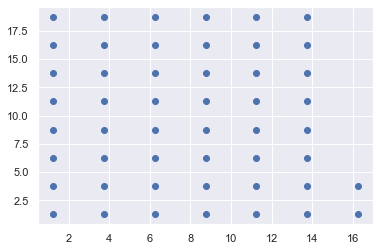

In [4]:
plt.scatter(initpos[:, 0], initpos[:, 1])

In [5]:
for i in range(time_steps):
    temp[i] = np.asarray((e.time, e.avgT))
    energy[i] = np.asarray((e.time, e.energy))
    pressure[i] = np.asarray((e.time, e.avgP))
    e.step_forward()
endpos = e.pos.copy()
scale = np.sqrt(e.avgT)    
velocities = np.sqrt(e.vel[:, 0] * e.vel[:, 0] + e.vel[:, 1] * e.vel[:, 1])
sampling = maxwell.rvs(size=e.N, scale=scale)

time: 0.0200
iterations: 1
E: 0.0
avgT: 0.0
instantT: 0.0
avgP: 0.0
instantP: 0.0

time: 0.0400
iterations: 2
E: 38.25269727095416
avgT: 0.0
instantT: 0.7657411220441329
avgP: 0.0
instantP: 0.10158647436587222

time: 0.0600
iterations: 3
E: 38.252718187087666
avgT: 0.0
instantT: 0.7664765477041314
avgP: 0.0
instantP: 0.1059559424006061

time: 0.0800
iterations: 4
E: 38.252765760170085
avgT: 0.0
instantT: 0.7672654766422997
avgP: 0.0
instantP: 0.10868683906233258

time: 0.1000
iterations: 5
E: 38.25279228633927
avgT: 0.0
instantT: 0.76811399605455
avgP: 0.0
instantP: 0.1137199004933461

time: 0.1200
iterations: 6
E: 38.25282195986466
avgT: 0.7690285164340911
instantT: 0.7690285164340911
avgP: 0.11718901902648263
instantP: 0.11718901902648263

time: 0.1400
iterations: 7
E: 38.25285591760049
avgT: 0.7690285164340911
instantT: 0.7700164031269763
avgP: 0.11718901902648263
instantP: 0.18455827766921634

time: 0.1600
iterations: 8
E: 38.252894512606275
avgT: 0.7690285164340911
instantT: 0.771

time: 1.7800
iterations: 89
E: 16.22439726538881
avgT: 0.5160217974580471
instantT: 0.49083524281079777
avgP: 0.9438696255796714
instantP: 4.334330307977148

time: 1.8000
iterations: 90
E: 15.789892205004758
avgT: 0.5160217974580471
instantT: 0.5566651794862706
avgP: 0.9438696255796714
instantP: 3.112139727820148

time: 1.8200
iterations: 91
E: 14.76806645758762
avgT: 0.5207789207535006
instantT: 0.6016500167762124
avgP: 0.999431444230513
instantP: 1.9439823612948224

time: 1.8400
iterations: 92
E: 14.898341560027266
avgT: 0.5207789207535006
instantT: 0.6136676462035403
avgP: 0.999431444230513
instantP: 1.6264341395243254

time: 1.8600
iterations: 93
E: 14.997009445204348
avgT: 0.5207789207535006
instantT: 0.5981737562397713
avgP: 0.999431444230513
instantP: 1.9061381702123579

time: 1.8800
iterations: 94
E: 15.0195494049989
avgT: 0.5207789207535006
instantT: 0.582175454457093
avgP: 0.999431444230513
instantP: 2.135381570979605

time: 1.9000
iterations: 95
E: 14.982983128175293
avgT: 0


time: 3.4400
iterations: 172
E: 4.747711729342418
avgT: 0.513981675627768
instantT: 0.40559491722360164
avgP: 1.5329410801363743
instantP: 2.4359967912326073

time: 3.4600
iterations: 173
E: 4.589037555759653
avgT: 0.513981675627768
instantT: 0.4464072116247496
avgP: 1.5329410801363743
instantP: 1.7790616185895258

time: 3.4800
iterations: 174
E: 4.649600172636994
avgT: 0.513981675627768
instantT: 0.4626178966735033
avgP: 1.5329410801363743
instantP: 1.6164016534507726

time: 3.5000
iterations: 175
E: 4.700667066490649
avgT: 0.513981675627768
instantT: 0.4566990115703112
avgP: 1.5329410801363743
instantP: 1.911131824714611

time: 3.5200
iterations: 176
E: 4.745353817537616
avgT: 0.5119853506339407
instantT: 0.44411030084381226
avgP: 1.5539866110524603
instantP: 2.269534662199382

time: 3.5400
iterations: 177
E: 4.7521798429263455
avgT: 0.5119853506339407
instantT: 0.4382649165268188
avgP: 1.5539866110524603
instantP: 2.366359635842636

time: 3.5600
iterations: 178
E: 4.691814220684655

time: 5.4000
iterations: 270
E: 5.953469012653645
avgT: 0.48376425991295813
instantT: 0.45594854907147636
avgP: 1.6921871104712476
instantP: 2.199230219219574

time: 5.4200
iterations: 271
E: 6.764125579437044
avgT: 0.48323199509704085
instantT: 0.4550219598534271
avgP: 1.7082454054214986
instantP: 2.559335037784792

time: 5.4400
iterations: 272
E: 6.786101544182934
avgT: 0.48323199509704085
instantT: 0.45619477480233217
avgP: 1.7082454054214986
instantP: 2.6188158291139874

time: 5.4600
iterations: 273
E: 6.710330570967134
avgT: 0.48323199509704085
instantT: 0.4787665748533137
avgP: 1.7082454054214986
instantP: 2.3050842046860436

time: 5.4800
iterations: 274
E: 6.690835640036212
avgT: 0.48323199509704085
instantT: 0.5047444939404173
avgP: 1.7082454054214986
instantP: 1.9094067969312702

time: 5.5000
iterations: 275
E: 6.706746932715774
avgT: 0.48323199509704085
instantT: 0.523685797506044
avgP: 1.7082454054214986
instantP: 1.6803611948934103

time: 5.5200
iterations: 276
E: 6.7228768

instantT: 0.6179123402624256
avgP: 1.8152566257679634
instantP: 2.19577393921056

time: 7.1400
iterations: 357
E: 10.228498970345246
avgT: 0.5017559502452608
instantT: 0.6061162167646031
avgP: 1.8152566257679634
instantP: 2.476010014976983

time: 7.1600
iterations: 358
E: 10.258772034078362
avgT: 0.5017559502452608
instantT: 0.5960708927697278
avgP: 1.8152566257679634
instantP: 2.7309468251901983

time: 7.1800
iterations: 359
E: 10.269160837399173
avgT: 0.5017559502452608
instantT: 0.5976436896502897
avgP: 1.8152566257679634
instantP: 2.7083533866590095

time: 7.2000
iterations: 360
E: 10.213296158440855
avgT: 0.5017559502452608
instantT: 0.6124849602847785
avgP: 1.8152566257679634
instantP: 2.354274047787392

time: 7.2200
iterations: 361
E: 10.087178216265109
avgT: 0.5034802810854834
instantT: 0.6259077707412942
avgP: 1.8183518652514072
instantP: 2.0381138685759193

time: 7.2400
iterations: 362
E: 10.091011924589669
avgT: 0.5034802810854834
instantT: 0.6341482570396141
avgP: 1.8183518

avgT: 0.5157400568294683
instantT: 0.4804054991224582
avgP: 1.916538541380125
instantP: 2.213693189242897

time: 8.8200
iterations: 441
E: 4.85536222910487
avgT: 0.5152905634981374
instantT: 0.4761846436723404
avgP: 1.9172795846814166
instantP: 1.981750351893776

time: 8.8400
iterations: 442
E: 4.861412312251904
avgT: 0.5152905634981374
instantT: 0.48401692962076626
avgP: 1.9172795846814166
instantP: 1.784441443705064

time: 8.8600
iterations: 443
E: 4.879628895406746
avgT: 0.5152905634981374
instantT: 0.4872305616917684
avgP: 1.9172795846814166
instantP: 1.7351368511909286

time: 8.8800
iterations: 444
E: 4.882762582681593
avgT: 0.5152905634981374
instantT: 0.4891093804586692
avgP: 1.9172795846814166
instantP: 1.7355540200723505

time: 8.9000
iterations: 445
E: 4.877130958141432
avgT: 0.5152905634981374
instantT: 0.490430582155658
avgP: 1.9172795846814166
instantP: 1.7311815342841628

time: 8.9200
iterations: 446
E: 4.873990510585866
avgT: 0.515003987341664
instantT: 0.489785285572004

time: 10.9800
iterations: 549
E: 1.400783709596162
avgT: 0.4982310820939557
instantT: 0.41791931444550445
avgP: 1.9433264652780755
instantP: 1.6991512860639224

time: 11.0000
iterations: 550
E: 1.394997353258315
avgT: 0.4982310820939557
instantT: 0.41204474268588176
avgP: 1.9433264652780755
instantP: 1.7697450264290797

time: 11.0200
iterations: 551
E: 1.4620212459790842
avgT: 0.49739611317972804
instantT: 0.4063845015289152
avgP: 1.9422895343531972
instantP: 1.8292640635414676

time: 11.0400
iterations: 552
E: 1.468585584375898
avgT: 0.49739611317972804
instantT: 0.3978782253321009
avgP: 1.9422895343531972
instantP: 2.0216126445906966

time: 11.0600
iterations: 553
E: 1.4848686962641118
avgT: 0.49739611317972804
instantT: 0.3908823458503649
avgP: 1.9422895343531972
instantP: 2.1575506558895374

time: 11.0800
iterations: 554
E: 1.480863252977798
avgT: 0.49739611317972804
instantT: 0.3894229504942225
avgP: 1.9422895343531972
instantP: 2.174420673548691

time: 11.1000
iterations: 555
E: 

E: 3.306115280826223
avgT: 0.49437213634308713
instantT: 0.4962756139373728
avgP: 1.9869522229603787
instantP: 1.9604658447225993

time: 12.7000
iterations: 635
E: 3.2989516432233046
avgT: 0.49437213634308713
instantT: 0.5073782575977321
avgP: 1.9869522229603787
instantP: 1.6262632803724104

time: 12.7200
iterations: 636
E: 3.2914894485154207
avgT: 0.4944996577490744
instantT: 0.5105673549034744
avgP: 1.9836917066424473
instantP: 1.5728666505831146

time: 12.7400
iterations: 637
E: 3.291439794178647
avgT: 0.4944996577490744
instantT: 0.50401163500051
avgP: 1.9836917066424473
instantP: 1.6879742507607067

time: 12.7600
iterations: 638
E: 3.3107025528444005
avgT: 0.4944996577490744
instantT: 0.4891438626930362
avgP: 1.9836917066424473
instantP: 2.0881146723212445

time: 12.7800
iterations: 639
E: 3.338044564654062
avgT: 0.4944996577490744
instantT: 0.4728813813569028
avgP: 1.9836917066424473
instantP: 2.511274104124725

time: 12.8000
iterations: 640
E: 3.3501583173508642
avgT: 0.49449965

time: 13.9200
iterations: 696
E: 4.727284123163912
avgT: 0.4971374220202483
instantT: 0.5295515181496296
avgP: 2.0302932851368944
instantP: 2.759784153900365

time: 13.9400
iterations: 697
E: 4.734592389447965
avgT: 0.4971374220202483
instantT: 0.5362638920193631
avgP: 2.0302932851368944
instantP: 2.6446602168331768

time: 13.9600
iterations: 698
E: 4.7940062528438006
avgT: 0.4971374220202483
instantT: 0.53024706832305
avgP: 2.0302932851368944
instantP: 2.7573898186349814

time: 13.9800
iterations: 699
E: 4.83698235562197
avgT: 0.4971374220202483
instantT: 0.5251080373563681
avgP: 2.0302932851368944
instantP: 2.8573890825167014

time: 14.0000
iterations: 700
E: 4.827357203981279
avgT: 0.4971374220202483
instantT: 0.5314596147236073
avgP: 2.0302932851368944
instantP: 2.6979384437904153

time: 14.0200
iterations: 701
E: 4.945240802556384
avgT: 0.4975107459926735
instantT: 0.549402778159767
avgP: 2.0324003569058484
instantP: 2.3252833327904474

time: 14.0400
iterations: 702
E: 4.925839237


time: 15.6000
iterations: 780
E: 5.073887413158658
avgT: 0.5037896504307755
instantT: 0.585806920976968
avgP: 2.0592391898292512
instantP: 3.282454168038925

time: 15.6200
iterations: 781
E: 4.879130960412585
avgT: 0.5042878628608322
instantT: 0.5815107895196279
avgP: 2.0666099595985963
instantP: 3.2090792738470735

time: 15.6400
iterations: 782
E: 4.783953388176339
avgT: 0.5042878628608322
instantT: 0.5968590695101544
avgP: 2.0666099595985963
instantP: 2.8781896384191326

time: 15.6600
iterations: 783
E: 4.750260949714587
avgT: 0.5042878628608322
instantT: 0.6072738013980553
avgP: 2.0666099595985963
instantP: 2.6785251868033626

time: 15.6800
iterations: 784
E: 4.806365827993059
avgT: 0.5042878628608322
instantT: 0.6017836542191307
avgP: 2.0666099595985963
instantP: 2.737149265078905

time: 15.7000
iterations: 785
E: 4.853802750498772
avgT: 0.5042878628608322
instantT: 0.5922428412961264
avgP: 2.0666099595985963
instantP: 2.8651848300326637

time: 15.7200
iterations: 786
E: 4.8409708

avgT: 0.5087608109321184
instantT: 0.5480422709077473
avgP: 2.1102223427814857
instantP: 2.6238850635067217

time: 17.3200
iterations: 866
E: 1.7487409114944086
avgT: 0.5088213468800838
instantT: 0.5192335299301157
avgP: 2.1166912765184906
instantP: 3.2293478792832695

time: 17.3400
iterations: 867
E: 1.826306982016927
avgT: 0.5088213468800838
instantT: 0.4921106756344814
avgP: 2.1166912765184906
instantP: 3.8188686842669024

time: 17.3600
iterations: 868
E: 1.8045187519408863
avgT: 0.5088213468800838
instantT: 0.48763454348072344
avgP: 2.1166912765184906
instantP: 3.941733319662841

time: 17.3800
iterations: 869
E: 1.7846405190940189
avgT: 0.5088213468800838
instantT: 0.5061664314418702
avgP: 2.1166912765184906
instantP: 3.6134892430280194

time: 17.4000
iterations: 870
E: 1.7371294461229212
avgT: 0.5088213468800838
instantT: 0.5375326966452657
avgP: 2.1166912765184906
instantP: 2.912688186078895

time: 17.4200
iterations: 871
E: 1.2135134831392733
avgT: 0.5090872342571581
instantT: 0


time: 19.2600
iterations: 963
E: -3.3952669020988573
avgT: 0.510560052391075
instantT: 0.519056075764499
avgP: 2.1846757672661834
instantP: 2.822522733359942

time: 19.2800
iterations: 964
E: -3.3993496795590907
avgT: 0.510560052391075
instantT: 0.5331517906492832
avgP: 2.1846757672661834
instantP: 2.4552693544306283

time: 19.3000
iterations: 965
E: -3.3917521618869593
avgT: 0.510560052391075
instantT: 0.5394444952449184
avgP: 2.1846757672661834
instantP: 2.3531264128260294

time: 19.3200
iterations: 966
E: -3.388165384382148
avgT: 0.5107057450169006
instantT: 0.5386787291754015
avgP: 2.186048016944507
instantP: 2.449519955182658

time: 19.3400
iterations: 967
E: -3.3808683717150174
avgT: 0.5107057450169006
instantT: 0.5322541822378619
avgP: 2.186048016944507
instantP: 2.733440078399824

time: 19.3600
iterations: 968
E: -3.3633056061140927
avgT: 0.5107057450169006
instantT: 0.5232372736108296
avgP: 2.186048016944507
instantP: 3.0001776659967505

time: 19.3800
iterations: 969
E: -3.34

avgT: 0.5082903405120189
instantT: 0.41945669428426585
avgP: 2.2860938482331425
instantP: 2.2484045895650824

time: 21.1400
iterations: 1057
E: -8.009234252743788
avgT: 0.5082903405120189
instantT: 0.41188317929419954
avgP: 2.2860938482331425
instantP: 2.421830277505598

time: 21.1600
iterations: 1058
E: -8.004598137061361
avgT: 0.5082903405120189
instantT: 0.39758620083332097
avgP: 2.2860938482331425
instantP: 2.6544018708861823

time: 21.1800
iterations: 1059
E: -7.970092098458085
avgT: 0.5082903405120189
instantT: 0.3796897378579638
avgP: 2.2860938482331425
instantP: 2.933372397159046

time: 21.2000
iterations: 1060
E: -7.941868747423403
avgT: 0.5082903405120189
instantT: 0.3684628358570062
avgP: 2.2860938482331425
instantP: 3.0712257665400995

time: 21.2200
iterations: 1061
E: -8.272677911215787
avgT: 0.5076139756506818
instantT: 0.3649009899085696
avgP: 2.2891172910795574
instantP: 2.9270637316730994

time: 21.2400
iterations: 1062
E: -8.320150633504507
avgT: 0.5076139756506818
in

avgP: 2.3290084586159625
instantP: 1.8819940085331928

time: 22.8200
iterations: 1141
E: -9.35119314326959
avgT: 0.49872832330764577
instantT: 0.3432151391993279
avgP: 2.3278832653289543
instantP: 2.072464389178079

time: 22.8400
iterations: 1142
E: -9.346124493068146
avgT: 0.49872832330764577
instantT: 0.33651206608587814
avgP: 2.3278832653289543
instantP: 2.346881186501442

time: 22.8600
iterations: 1143
E: -9.328176216385035
avgT: 0.49872832330764577
instantT: 0.3288317174339519
avgP: 2.3278832653289543
instantP: 2.5759097794547223

time: 22.8800
iterations: 1144
E: -9.311867974014053
avgT: 0.49872832330764577
instantT: 0.3256371061208671
avgP: 2.3278832653289543
instantP: 2.6576077317410034

time: 22.9000
iterations: 1145
E: -9.321868669300311
avgT: 0.49872832330764577
instantT: 0.3312066500093387
avgP: 2.3278832653289543
instantP: 2.5014555916975256

time: 22.9200
iterations: 1146
E: -9.350777757434109
avgT: 0.49804812634525003
instantT: 0.3429632189190258
avgP: 2.327541142399838


avgT: 0.49292367987365265
instantT: 0.41454174409593814
avgP: 2.3335257306935384
instantP: 2.8772417450124483

time: 24.0600
iterations: 1203
E: -8.22842283801615
avgT: 0.49292367987365265
instantT: 0.39982175644605605
avgP: 2.3335257306935384
instantP: 3.1497286144323757

time: 24.0800
iterations: 1204
E: -8.239593120575215
avgT: 0.49292367987365265
instantT: 0.3906636261476934
avgP: 2.3335257306935384
instantP: 3.364766212928426

time: 24.1000
iterations: 1205
E: -8.246486102165985
avgT: 0.49292367987365265
instantT: 0.38601450321581504
avgP: 2.3335257306935384
instantP: 3.443630327224743

time: 24.1200
iterations: 1206
E: -8.233612111037829
avgT: 0.4924758819501057
instantT: 0.3850043802988381
avgP: 2.3378661005731596
instantP: 3.3795548716822372

time: 24.1400
iterations: 1207
E: -8.233557873552563
avgT: 0.4924758819501057
instantT: 0.38977821587252437
avgP: 2.3378661005731596
instantP: 3.1307522395466134

time: 24.1600
iterations: 1208
E: -8.250311985503313
avgT: 0.492475881950105

instantT: 0.5062609645759625
avgP: 2.350793900320036
instantP: 3.470891509228305

time: 25.1000
iterations: 1255
E: -6.265709011812525
avgT: 0.490615839723012
instantT: 0.4918763523905978
avgP: 2.350793900320036
instantP: 3.7790973864364634

time: 25.1200
iterations: 1256
E: -6.2398372917805744
avgT: 0.49056485845002185
instantT: 0.47781954020248946
avgP: 2.3570449781231035
instantP: 3.919814428889926

time: 25.1400
iterations: 1257
E: -6.233462188752135
avgT: 0.49056485845002185
instantT: 0.4718917317324335
avgP: 2.3570449781231035
instantP: 3.94381241629287

time: 25.1600
iterations: 1258
E: -6.2781039496950015
avgT: 0.49056485845002185
instantT: 0.4754455876568715
avgP: 2.3570449781231035
instantP: 3.758104969692576

time: 25.1800
iterations: 1259
E: -6.3408108840094854
avgT: 0.49056485845002185
instantT: 0.4757708072680892
avgP: 2.3570449781231035
instantP: 3.650109100061235

time: 25.2000
iterations: 1260
E: -6.264563475150052
avgT: 0.49056485845002185
instantT: 0.4610539630378392

time: 26.8400
iterations: 1342
E: -1.9513658984662818
avgT: 0.49135058587929836
instantT: 0.5696791181732087
avgP: 2.394637551301362
instantP: 2.925724982626949

time: 26.8600
iterations: 1343
E: -1.8783466064803385
avgT: 0.49135058587929836
instantT: 0.5455730637286265
avgP: 2.394637551301362
instantP: 3.3775131808876666

time: 26.8800
iterations: 1344
E: -1.9038735368833706
avgT: 0.49135058587929836
instantT: 0.5302519404189322
avgP: 2.394637551301362
instantP: 3.7746054588548352

time: 26.9000
iterations: 1345
E: -1.9244032187775701
avgT: 0.49135058587929836
instantT: 0.5229784304281327
avgP: 2.394637551301362
instantP: 3.8627748809552607

time: 26.9200
iterations: 1346
E: -1.8857561039106798
avgT: 0.4914582290413561
instantT: 0.5203065964728221
avgP: 2.3999389610804833
instantP: 3.82071678188507

time: 26.9400
iterations: 1347
E: -1.91637998000283
avgT: 0.4914582290413561
instantT: 0.526489076188624
avgP: 2.3999389610804833
instantP: 3.548450119793857

time: 26.9600
iterations: 134

avgT: 0.4932572336837556
instantT: 0.5023422068888186
avgP: 2.4229877822499017
instantP: 2.8049906755692002

time: 28.4400
iterations: 1422
E: 1.4105521404901395
avgT: 0.4932572336837556
instantT: 0.49977592592800213
avgP: 2.4229877822499017
instantP: 2.768919509537537

time: 28.4600
iterations: 1423
E: 1.3884507897727723
avgT: 0.4932572336837556
instantT: 0.504121907872769
avgP: 2.4229877822499017
instantP: 2.5080529569500465

time: 28.4800
iterations: 1424
E: 1.355287032992262
avgT: 0.4932572336837556
instantT: 0.5082295595214601
avgP: 2.4229877822499017
instantP: 2.298271990514727

time: 28.5000
iterations: 1425
E: 1.320505088185378
avgT: 0.4932572336837556
instantT: 0.5020626612364487
avgP: 2.4229877822499017
instantP: 2.3414014286125373

time: 28.5200
iterations: 1426
E: 1.3674459289433791
avgT: 0.4932123368712846
instantT: 0.480461642129513
avgP: 2.4237883763544423
instantP: 2.6511571020439484

time: 28.5400
iterations: 1427
E: 1.4912020096230982
avgT: 0.4932123368712846
instantT

avgT: 0.4991714355249516
instantT: 0.5797166738093523
avgP: 2.4453664002090147
instantP: 3.381704650952742

time: 30.5200
iterations: 1526
E: 3.880111979205715
avgT: 0.4994006043575137
instantT: 0.5690679294564
avgP: 2.449406732896045
instantP: 3.677667869753234

time: 30.5400
iterations: 1527
E: 3.978965771250408
avgT: 0.4994006043575137
instantT: 0.5734604689768901
avgP: 2.449406732896045
instantP: 3.7029001838329436

time: 30.5600
iterations: 1528
E: 3.8213119851100075
avgT: 0.4994006043575137
instantT: 0.6044508024879681
avgP: 2.449406732896045
instantP: 3.140853973634128

time: 30.5800
iterations: 1529
E: 3.844803362113204
avgT: 0.4994006043575137
instantT: 0.6283537328540529
avgP: 2.449406732896045
instantP: 2.6756177254501803

time: 30.6000
iterations: 1530
E: 3.880404473141013
avgT: 0.4994006043575137
instantT: 0.6359640660752077
avgP: 2.449406732896045
instantP: 2.5332200824354896

time: 30.6200
iterations: 1531
E: 3.9314589916353206
avgT: 0.49984267941288557
instantT: 0.63467


time: 32.0400
iterations: 1602
E: 2.649956366147361
avgT: 0.5052533908896916
instantT: 0.515644372819728
avgP: 2.467589945263156
instantP: 2.2701264747053935

time: 32.0600
iterations: 1603
E: 2.6494283679085626
avgT: 0.5052533908896916
instantT: 0.5174250629602508
avgP: 2.467589945263156
instantP: 2.0995290505078934

time: 32.0800
iterations: 1604
E: 2.643738767785319
avgT: 0.5052533908896916
instantT: 0.5207555128336867
avgP: 2.467589945263156
instantP: 1.9912963525316698

time: 32.1000
iterations: 1605
E: 2.6376105925923987
avgT: 0.5052533908896916
instantT: 0.5238820427814893
avgP: 2.467589945263156
instantP: 1.9359998158373666

time: 32.1200
iterations: 1606
E: 2.6344971125224603
avgT: 0.5053149359217666
instantT: 0.5250093461857921
avgP: 2.465928164034819
instantP: 1.934158170966882

time: 32.1400
iterations: 1607
E: 2.6377471488184376
avgT: 0.5053149359217666
instantT: 0.5235667813251615
avgP: 2.465928164034819
instantP: 1.9702528293803028

time: 32.1600
iterations: 1608
E: 2.6

avgP: 2.471962625380566
instantP: 2.716070628555749

time: 33.9000
iterations: 1695
E: -0.13948532735620134
avgT: 0.5065423163654486
instantT: 0.5945528392417105
avgP: 2.471962625380566
instantP: 2.834585571264973

time: 33.9200
iterations: 1696
E: -0.13727306225146663
avgT: 0.5067853651519463
instantT: 0.5889358549881755
avgP: 2.4733635991705287
instantP: 2.946892740177937

time: 33.9400
iterations: 1697
E: -0.11046324128934515
avgT: 0.5067853651519463
instantT: 0.5841748609878981
avgP: 2.4733635991705287
instantP: 3.014758402204331

time: 33.9600
iterations: 1698
E: -0.09508206441736533
avgT: 0.5067853651519463
instantT: 0.5879945985494492
avgP: 2.4733635991705287
instantP: 2.935897332435073

time: 33.9800
iterations: 1699
E: -0.13661438994380148
avgT: 0.5067853651519463
instantT: 0.603165123457069
avgP: 2.4733635991705287
instantP: 2.6062564502961965

time: 34.0000
iterations: 1700
E: -0.17375348784642952
avgT: 0.5067853651519463
instantT: 0.6195844363638024
avgP: 2.4733635991705287

instantP: 3.058563929895183

time: 35.4800
iterations: 1774
E: -3.811005916178747
avgT: 0.50908033647708
instantT: 0.5599128287950316
avgP: 2.509766293827293
instantP: 2.7700118378038034

time: 35.5000
iterations: 1775
E: -3.728637611291397
avgT: 0.50908033647708
instantT: 0.5493627862913283
avgP: 2.509766293827293
instantP: 2.9977643171085693

time: 35.5200
iterations: 1776
E: -3.5985927685884995
avgT: 0.5091382106071448
instantT: 0.5296256526500887
avgP: 2.5119906715237152
instantP: 3.2994203760571374

time: 35.5400
iterations: 1777
E: -3.673651305329795
avgT: 0.5091382106071448
instantT: 0.5281853097710737
avgP: 2.5119906715237152
instantP: 3.3313686135018887

time: 35.5600
iterations: 1778
E: -3.7082084772410155
avgT: 0.5091382106071448
instantT: 0.5334890738564543
avgP: 2.5119906715237152
instantP: 3.229470753763525

time: 35.5800
iterations: 1779
E: -3.692730156551846
avgT: 0.5091382106071448
instantT: 0.5310405715665588
avgP: 2.5119906715237152
instantP: 3.2373193086538787

time

avgP: 2.531458058000099
instantP: 2.4156238679452935

time: 37.2600
iterations: 1863
E: -7.015491309736213
avgT: 0.5061281748672896
instantT: 0.37675790945676657
avgP: 2.531458058000099
instantP: 2.506035390086114

time: 37.2800
iterations: 1864
E: -6.98288051974038
avgT: 0.5061281748672896
instantT: 0.36638972685851656
avgP: 2.531458058000099
instantP: 2.6989155930124693

time: 37.3000
iterations: 1865
E: -6.964022443780053
avgT: 0.5061281748672896
instantT: 0.3580763335096805
avgP: 2.531458058000099
instantP: 2.8182802216859266

time: 37.3200
iterations: 1866
E: -6.977648125685214
avgT: 0.5057281252669388
instantT: 0.35690967393644546
avgP: 2.53233810955235
instantP: 2.8597172869895715

time: 37.3400
iterations: 1867
E: -6.990209129680558
avgT: 0.5057281252669388
instantT: 0.35979005473654607
avgP: 2.53233810955235
instantP: 2.795192167103344

time: 37.3600
iterations: 1868
E: -6.990536311548681
avgT: 0.5057281252669388
instantT: 0.3622458188213942
avgP: 2.53233810955235
instantP: 2.

time: 38.3000
iterations: 1915
E: -7.748900909371773
avgT: 0.5025621433951118
instantT: 0.4176665661322106
avgP: 2.529611948722223
instantP: 3.0285379988827335

time: 38.3200
iterations: 1916
E: -7.7365486751051336
avgT: 0.5023699361532039
instantT: 0.4289467697443884
avgP: 2.5304779601697045
instantP: 2.8612943331075935

time: 38.3400
iterations: 1917
E: -7.755699206302616
avgT: 0.5023699361532039
instantT: 0.4455018946495295
avgP: 2.5304779601697045
instantP: 2.56423900066595

time: 38.3600
iterations: 1918
E: -7.789949079529144
avgT: 0.5023699361532039
instantT: 0.4616583804244114
avgP: 2.5304779601697045
instantP: 2.2801201722070084

time: 38.3800
iterations: 1919
E: -7.80055984279009
avgT: 0.5023699361532039
instantT: 0.4679840594587141
avgP: 2.5304779601697045
instantP: 2.2193374671069943

time: 38.4000
iterations: 1920
E: -7.791066398105908
avgT: 0.5023699361532039
instantT: 0.46076366597517654
avgP: 2.5304779601697045
instantP: 2.505508550349496

time: 38.4200
iterations: 1921


avgT: 0.499864827084367
instantT: 0.44509960642475477
avgP: 2.563068503003802
instantP: 3.348702030441679

time: 40.5000
iterations: 2025
E: -8.225224995385638
avgT: 0.499864827084367
instantT: 0.41604059223292
avgP: 2.563068503003802
instantP: 3.9365562298798547

time: 40.5200
iterations: 2026
E: -8.127458783875568
avgT: 0.4996162368843949
instantT: 0.399185796095662
avgP: 2.567325822578022
instantP: 4.287282930562843

time: 40.5400
iterations: 2027
E: -8.216309239466458
avgT: 0.4996162368843949
instantT: 0.41840503114975997
avgP: 2.567325822578022
instantP: 3.870420564241721

time: 40.5600
iterations: 2028
E: -8.299230206340798
avgT: 0.4996162368843949
instantT: 0.45291366774916875
avgP: 2.567325822578022
instantP: 3.155457091028773

time: 40.5800
iterations: 2029
E: -8.285569298752435
avgT: 0.4996162368843949
instantT: 0.47555517932972097
avgP: 2.567325822578022
instantP: 2.6613064291500046

time: 40.6000
iterations: 2030
E: -8.25285462897467
avgT: 0.4996162368843949
instantT: 0.482

avgP: 2.6008698334641926
instantP: 4.681272081524929

time: 42.2200
iterations: 2111
E: -7.958279288904933
avgT: 0.49936451728107667
instantT: 0.5039563236734145
avgP: 2.6046437753986997
instantP: 4.19347332982631

time: 42.2400
iterations: 2112
E: -8.001874790044447
avgT: 0.49936451728107667
instantT: 0.5354538782120182
avgP: 2.6046437753986997
instantP: 3.7169230090156846

time: 42.2600
iterations: 2113
E: -7.933046091205377
avgT: 0.49936451728107667
instantT: 0.5459667098750487
avgP: 2.6046437753986997
instantP: 3.5232106300380313

time: 42.2800
iterations: 2114
E: -7.874695854198038
avgT: 0.49936451728107667
instantT: 0.5489785591866975
avgP: 2.6046437753986997
instantP: 3.427018328693761

time: 42.3000
iterations: 2115
E: -7.912914804475591
avgT: 0.49936451728107667
instantT: 0.5577696331261854
avgP: 2.6046437753986997
instantP: 3.4510107033524062

time: 42.3200
iterations: 2116
E: -7.980752346849517
avgT: 0.4995174622156368
instantT: 0.5640602246000247
avgP: 2.606635290355739
ins

time: 44.2000
iterations: 2210
E: -7.655075994508628
avgT: 0.49906523733774005
instantT: 0.5132319845515265
avgP: 2.6286209603619026
instantP: 2.4793323246114483

time: 44.2200
iterations: 2211
E: -7.601794368315957
avgT: 0.49910261048711946
instantT: 0.5155841693634184
avgP: 2.628326323840384
instantP: 2.4983916178505368

time: 44.2400
iterations: 2212
E: -7.595046495969136
avgT: 0.49910261048711946
instantT: 0.5125757802213439
avgP: 2.628326323840384
instantP: 2.697847872661047

time: 44.2600
iterations: 2213
E: -7.580017078938656
avgT: 0.49910261048711946
instantT: 0.5075857328750878
avgP: 2.628326323840384
instantP: 2.905744150779503

time: 44.2800
iterations: 2214
E: -7.560943789133866
avgT: 0.49910261048711946
instantT: 0.5054356413268972
avgP: 2.628326323840384
instantP: 3.0280974522963553

time: 44.3000
iterations: 2215
E: -7.567394048797198
avgT: 0.49910261048711946
instantT: 0.5107899320670988
avgP: 2.628326323840384
instantP: 2.962244449294212

time: 44.3200
iterations: 2216

time: 45.8600
iterations: 2293
E: -7.645646006086139
avgT: 0.5010464042648516
instantT: 0.5169761889511428
avgP: 2.669287984761984
instantP: 3.176462980873552

time: 45.8800
iterations: 2294
E: -7.6463454371026565
avgT: 0.5010464042648516
instantT: 0.5267823554048281
avgP: 2.669287984761984
instantP: 2.9328789137797378

time: 45.9000
iterations: 2295
E: -7.649151214995332
avgT: 0.5010464042648516
instantT: 0.5343470869045779
avgP: 2.669287984761984
instantP: 2.7320104618730454

time: 45.9200
iterations: 2296
E: -7.653171915430853
avgT: 0.5011267345318221
instantT: 0.5379179968043508
avgP: 2.66921973020421
instantP: 2.6379591427436972

time: 45.9400
iterations: 2297
E: -7.648019184215336
avgT: 0.5011267345318221
instantT: 0.5361386987506503
avgP: 2.66921973020421
instantP: 2.683900448654504

time: 45.9600
iterations: 2298
E: -7.633772936563439
avgT: 0.5011267345318221
instantT: 0.5303738012225548
avgP: 2.66921973020421
instantP: 2.894539956946548

time: 45.9800
iterations: 2299
E: -7.62

avgP: 2.700759963362247
instantP: 3.0925324253309303

time: 47.7600
iterations: 2388
E: -8.633933459263666
avgT: 0.5030666448084022
instantT: 0.49752661138438553
avgP: 2.700759963362247
instantP: 3.0679109545908405

time: 47.7800
iterations: 2389
E: -8.660638035996946
avgT: 0.5030666448084022
instantT: 0.5017518786673912
avgP: 2.700759963362247
instantP: 2.990044735269422

time: 47.8000
iterations: 2390
E: -8.695635158601164
avgT: 0.5030666448084022
instantT: 0.5025377773664874
avgP: 2.700759963362247
instantP: 2.9991564629657557

time: 47.8200
iterations: 2391
E: -8.85538287469101
avgT: 0.5030374983432127
instantT: 0.48913463444777905
avgP: 2.701766679210392
instantP: 3.181970138775512

time: 47.8400
iterations: 2392
E: -8.779210315507129
avgT: 0.5030374983432127
instantT: 0.4707129698628229
avgP: 2.701766679210392
instantP: 3.5487917396197814

time: 47.8600
iterations: 2393
E: -8.75302544925185
avgT: 0.5030374983432127
instantT: 0.4647427235079495
avgP: 2.701766679210392
instantP: 3.

time: 49.4000
iterations: 2470
E: -9.806939308327792
avgT: 0.5025894709632204
instantT: 0.4857634579074083
avgP: 2.7181428236592144
instantP: 2.8433750801005755

time: 49.4200
iterations: 2471
E: -9.944896940913281
avgT: 0.502571321187016
instantT: 0.4936234815182502
avgP: 2.718251653034887
instantP: 2.7719045352415304

time: 49.4400
iterations: 2472
E: -9.92927607455227
avgT: 0.502571321187016
instantT: 0.49900585656390123
avgP: 2.718251653034887
instantP: 2.7736676965460907

time: 49.4600
iterations: 2473
E: -9.925684535822207
avgT: 0.502571321187016
instantT: 0.5009006927790522
avgP: 2.718251653034887
instantP: 2.777572735029261

time: 49.4800
iterations: 2474
E: -9.929552111765204
avgT: 0.502571321187016
instantT: 0.5002246256846672
avgP: 2.718251653034887
instantP: 2.774695943507474

time: 49.5000
iterations: 2475
E: -9.960312661534275
avgT: 0.502571321187016
instantT: 0.49524162518836917
avgP: 2.718251653034887
instantP: 2.840765569940898

time: 49.5200
iterations: 2476
E: -10.01

instantP: 2.990360146461757

time: 51.2000
iterations: 2560
E: -10.548206006875368
avgT: 0.5003844984001214
instantT: 0.41338537947315174
avgP: 2.7144351930591273
instantP: 3.153141062167202

time: 51.2200
iterations: 2561
E: -10.565384050950247
avgT: 0.5002101837669838
instantT: 0.41113540623362804
avgP: 2.715476655871866
instantP: 3.2476641531814536

time: 51.2400
iterations: 2562
E: -10.570072202109554
avgT: 0.5002101837669838
instantT: 0.41424710905864925
avgP: 2.715476655871866
instantP: 3.218380161139043

time: 51.2600
iterations: 2563
E: -10.562456932331415
avgT: 0.5002101837669838
instantT: 0.4216231593970564
avgP: 2.715476655871866
instantP: 3.054322039816385

time: 51.2800
iterations: 2564
E: -10.567915638327417
avgT: 0.5002101837669838
instantT: 0.4338699576408832
avgP: 2.715476655871866
instantP: 2.7265880924839982

time: 51.3000
iterations: 2565
E: -10.583454813000444
avgT: 0.5002101837669838
instantT: 0.44870977406202883
avgP: 2.715476655871866
instantP: 2.355626040723110

avgT: 0.4983371928455882
instantT: 0.3816601192730349
avgP: 2.7149079082134095
instantP: 2.2563923385065987

time: 52.2800
iterations: 2614
E: -10.461221226813887
avgT: 0.4983371928455882
instantT: 0.3846698836509333
avgP: 2.7149079082134095
instantP: 2.248582983496822

time: 52.3000
iterations: 2615
E: -10.462368925753601
avgT: 0.4983371928455882
instantT: 0.38805635554049617
avgP: 2.7149079082134095
instantP: 2.268754628066164

time: 52.3200
iterations: 2616
E: -10.467810262748113
avgT: 0.49813271480616844
instantT: 0.3913951782290802
avgP: 2.7140991238068986
instantP: 2.2919136636082067

time: 52.3400
iterations: 2617
E: -10.472324939734197
avgT: 0.49813271480616844
instantT: 0.39317580785671047
avgP: 2.7140991238068986
instantP: 2.3505287031710163

time: 52.3600
iterations: 2618
E: -10.472552928087534
avgT: 0.49813271480616844
instantT: 0.3921362963559797
avgP: 2.7140991238068986
instantP: 2.4401933496984674

time: 52.3800
iterations: 2619
E: -10.464556237330687
avgT: 0.49813271480

avgP: 2.7204285821222527
instantP: 2.674171617909618

time: 53.4600
iterations: 2673
E: -9.802323220829528
avgT: 0.4967909434610353
instantT: 0.4843164229409622
avgP: 2.7204285821222527
instantP: 2.9712137124528457

time: 53.4800
iterations: 2674
E: -9.7824385923813
avgT: 0.4967909434610353
instantT: 0.470427780657073
avgP: 2.7204285821222527
instantP: 3.331137535504677

time: 53.5000
iterations: 2675
E: -9.764169098274511
avgT: 0.4967909434610353
instantT: 0.46074075497842165
avgP: 2.7204285821222527
instantP: 3.6173569166424255

time: 53.5200
iterations: 2676
E: -9.78562555201733
avgT: 0.4967237062375802
instantT: 0.460819028912592
avgP: 2.722352555198018
instantP: 3.7497541776567402

time: 53.5400
iterations: 2677
E: -9.785090015179971
avgT: 0.4967237062375802
instantT: 0.46824557512038273
avgP: 2.722352555198018
instantP: 3.714032247238324

time: 53.5600
iterations: 2678
E: -9.781124715243688
avgT: 0.4967237062375802
instantT: 0.4818169029284454
avgP: 2.722352555198018
instantP: 3.

avgP: 2.730538094954967
instantP: 2.3518509949504427

time: 54.5000
iterations: 2725
E: -9.0207426772844
avgT: 0.4969590560258215
instantT: 0.48599415922328426
avgP: 2.730538094954967
instantP: 2.4439762888766405

time: 54.5200
iterations: 2726
E: -9.03128733861918
avgT: 0.49691931997823563
instantT: 0.4753029100914932
avgP: 2.730536896172606
instantP: 2.7298847585682164

time: 54.5400
iterations: 2727
E: -9.020421073228977
avgT: 0.49691931997823563
instantT: 0.45742665940716054
avgP: 2.730536896172606
instantP: 3.2108446331430027

time: 54.5600
iterations: 2728
E: -8.99071939868374
avgT: 0.49691931997823563
instantT: 0.43815739025851674
avgP: 2.730536896172606
instantP: 3.7126965250338606

time: 54.5800
iterations: 2729
E: -8.973983535508616
avgT: 0.49691931997823563
instantT: 0.42753467925901306
avgP: 2.730536896172606
instantP: 4.0873794950159406

time: 54.6000
iterations: 2730
E: -8.982434445808483
avgT: 0.49691931997823563
instantT: 0.4318276941760406
avgP: 2.730536896172606
insta

instantT: 0.49577219501142267
avgP: 2.74643514880631
instantP: 3.498692912671977

time: 56.1400
iterations: 2807
E: -7.815833821602258
avgT: 0.49653648336679707
instantT: 0.4955694775706221
avgP: 2.74643514880631
instantP: 3.6409531485619886

time: 56.1600
iterations: 2808
E: -7.798209819145768
avgT: 0.49653648336679707
instantT: 0.4936566719707365
avgP: 2.74643514880631
instantP: 3.70850620848408

time: 56.1800
iterations: 2809
E: -7.812413631265823
avgT: 0.49653648336679707
instantT: 0.4948678148131463
avgP: 2.74643514880631
instantP: 3.59485385166173

time: 56.2000
iterations: 2810
E: -7.8720322012834245
avgT: 0.49653648336679707
instantT: 0.4954149426097008
avgP: 2.74643514880631
instantP: 3.596006132726051

time: 56.2200
iterations: 2811
E: -7.70067833148282
avgT: 0.49652055109870175
instantT: 0.48758254869723333
avgP: 2.748467629643433
instantP: 3.888689379269554

time: 56.2400
iterations: 2812
E: -7.627449941814085
avgT: 0.49652055109870175
instantT: 0.46800109704271364
avgP: 2.

instantP: 2.51892047643732

time: 57.9400
iterations: 2897
E: -6.1511808832694825
avgT: 0.4960638103740367
instantT: 0.5108970460273793
avgP: 2.757987061286561
instantP: 2.507450337826226

time: 57.9600
iterations: 2898
E: -6.143987583797767
avgT: 0.4960638103740367
instantT: 0.5033792425412585
avgP: 2.757987061286561
instantP: 2.4823746725045006

time: 57.9800
iterations: 2899
E: -6.1492121127338635
avgT: 0.4960638103740367
instantT: 0.49778077003700344
avgP: 2.757987061286561
instantP: 2.4844720986076316

time: 58.0000
iterations: 2900
E: -6.16007542942328
avgT: 0.4960638103740367
instantT: 0.49289489507156853
avgP: 2.757987061286561
instantP: 2.4523796084446685

time: 58.0200
iterations: 2901
E: -5.968035134528481
avgT: 0.4960536767697158
instantT: 0.4901863198678961
avgP: 2.7576563506451346
instantP: 2.566174889259201

time: 58.0400
iterations: 2902
E: -5.959105692725135
avgT: 0.4960536767697158
instantT: 0.4818176289713898
avgP: 2.7576563506451346
instantP: 2.7506347598350267

tim

avgT: 0.4968213789693788
instantT: 0.4873550499196896
avgP: 2.7627650817086313
instantP: 2.5616942215118725

time: 59.7400
iterations: 2987
E: -4.48170798806354
avgT: 0.4968213789693788
instantT: 0.47524018733605417
avgP: 2.7627650817086313
instantP: 2.807740503562961

time: 59.7600
iterations: 2988
E: -4.473606290172153
avgT: 0.4968213789693788
instantT: 0.4670591393765359
avgP: 2.7627650817086313
instantP: 2.9064541649054823

time: 59.7800
iterations: 2989
E: -4.481831519523475
avgT: 0.4968213789693788
instantT: 0.46519193584918356
avgP: 2.7627650817086313
instantP: 2.849378846968755

time: 59.8000
iterations: 2990
E: -4.498906797650591
avgT: 0.4968213789693788
instantT: 0.4675181198973472
avgP: 2.7627650817086313
instantP: 2.739852931198474

time: 59.8200
iterations: 2991
E: -4.3563486247761105
avgT: 0.49678073967379316
instantT: 0.4725190802091906
avgP: 2.762411429939349
instantP: 2.5512813236781446

time: 59.8400
iterations: 2992
E: -4.342956529051531
avgT: 0.49678073967379316
ins

avgT: 0.49739149816163436
instantT: 0.6051312471622885
avgP: 2.7640559536725684
instantP: 3.9014678946644237

time: 60.7600
iterations: 3038
E: -3.723955152796215
avgT: 0.49739149816163436
instantT: 0.6139884655353947
avgP: 2.7640559536725684
instantP: 3.8361534784043974

time: 60.7800
iterations: 3039
E: -3.675560713474951
avgT: 0.49739149816163436
instantT: 0.6098883250509567
avgP: 2.7640559536725684
instantP: 4.013707148593249

time: 60.8000
iterations: 3040
E: -3.66447059365262
avgT: 0.49739149816163436
instantT: 0.6050315406451621
avgP: 2.7640559536725684
instantP: 4.198132281391644

time: 60.8200
iterations: 3041
E: -3.5333721713350457
avgT: 0.497574019043046
instantT: 0.6083641940599187
avgP: 2.7664782666306196
instantP: 4.236822232167717

time: 60.8400
iterations: 3042
E: -3.5898833265740038
avgT: 0.497574019043046
instantT: 0.6074730618325064
avgP: 2.7664782666306196
instantP: 4.256383940605427

time: 60.8600
iterations: 3043
E: -3.5916178689150406
avgT: 0.497574019043046
inst

avgT: 0.49825532030455794
instantT: 0.5064849581182542
avgP: 2.7756689412578095
instantP: 2.432984715070487

time: 62.5200
iterations: 3126
E: -2.6407802769015234
avgT: 0.49826129969871674
instantT: 0.5019924416537799
avgP: 2.775188053147452
instantP: 2.4751138722844424

time: 62.5400
iterations: 3127
E: -2.6448728910276174
avgT: 0.49826129969871674
instantT: 0.49724370244272104
avgP: 2.775188053147452
instantP: 2.534314924729047

time: 62.5600
iterations: 3128
E: -2.645234824484767
avgT: 0.49826129969871674
instantT: 0.49143165618649465
avgP: 2.775188053147452
instantP: 2.595572008760477

time: 62.5800
iterations: 3129
E: -2.63497057064766
avgT: 0.49826129969871674
instantT: 0.48517676140389504
avgP: 2.775188053147452
instantP: 2.6192890998766654

time: 62.6000
iterations: 3130
E: -2.6232107468639363
avgT: 0.49826129969871674
instantT: 0.48161291267829126
avgP: 2.775188053147452
instantP: 2.5633485107430496

time: 62.6200
iterations: 3131
E: -2.548813399069239
avgT: 0.4982400766834251

time: 63.5600
iterations: 3178
E: -2.2086089413641545
avgT: 0.49800196098644844
instantT: 0.5104566020038733
avgP: 2.7701318454064983
instantP: 2.620752557556762

time: 63.5800
iterations: 3179
E: -2.218143236112244
avgT: 0.49800196098644844
instantT: 0.5170612808337041
avgP: 2.7701318454064983
instantP: 2.450571455366499

time: 63.6000
iterations: 3180
E: -2.217851908529326
avgT: 0.49800196098644844
instantT: 0.5144651838438206
avgP: 2.7701318454064983
instantP: 2.5398508811315144

time: 63.6200
iterations: 3181
E: -2.1158358691373245
avgT: 0.4980125517727488
instantT: 0.5047377010734749
avgP: 2.770143013291302
instantP: 2.7772346201419014

time: 63.6400
iterations: 3182
E: -2.0506176279781165
avgT: 0.4980125517727488
instantT: 0.4896225503289269
avgP: 2.770143013291302
instantP: 3.079159696580355

time: 63.6600
iterations: 3183
E: -2.033855774598724
avgT: 0.4980125517727488
instantT: 0.4887692955384694
avgP: 2.770143013291302
instantP: 2.9778870201955345

time: 63.6800
iterations: 31

time: 65.4600
iterations: 3273
E: -1.238592377520753
avgT: 0.49806389032841997
instantT: 0.4981700960535018
avgP: 2.7669884339102406
instantP: 1.912876034768073

time: 65.4800
iterations: 3274
E: -1.260277132922159
avgT: 0.49806389032841997
instantT: 0.4896317608450717
avgP: 2.7669884339102406
instantP: 2.140676057821035

time: 65.5000
iterations: 3275
E: -1.2373687405237561
avgT: 0.49806389032841997
instantT: 0.46830355993161854
avgP: 2.7669884339102406
instantP: 2.5879171486879557

time: 65.5200
iterations: 3276
E: -1.1486580638858896
avgT: 0.4979858584433403
instantT: 0.44695300560124535
avgP: 2.767328445477163
instantP: 2.9896960102444816

time: 65.5400
iterations: 3277
E: -1.2050325016041477
avgT: 0.4979858584433403
instantT: 0.4448612721165326
avgP: 2.767328445477163
instantP: 3.1299447084333436

time: 65.5600
iterations: 3278
E: -1.2439834504161666
avgT: 0.4979858584433403
instantT: 0.45356433244421807
avgP: 2.767328445477163
instantP: 3.0487102773341737

time: 65.5800
iteration

time: 67.3200
iterations: 3366
E: -0.35014368110313043
avgT: 0.49819824347517555
instantT: 0.6215851744952866
avgP: 2.7603858065051385
instantP: 2.8042425212711244

time: 67.3400
iterations: 3367
E: -0.3673489722729535
avgT: 0.49819824347517555
instantT: 0.6021904023931512
avgP: 2.7603858065051385
instantP: 3.331562112040978

time: 67.3600
iterations: 3368
E: -0.2923961910895443
avgT: 0.49819824347517555
instantT: 0.5650231499150905
avgP: 2.7603858065051385
instantP: 4.116841155274432

time: 67.3800
iterations: 3369
E: -0.18851992515898885
avgT: 0.49819824347517555
instantT: 0.5346577897433704
avgP: 2.7603858065051385
instantP: 4.695533212992808

time: 67.4000
iterations: 3370
E: -0.22861059561867236
avgT: 0.49819824347517555
instantT: 0.537037561902327
avgP: 2.7603858065051385
instantP: 4.64121673440368

time: 67.4200
iterations: 3371
E: -0.20985137068351634
avgT: 0.49829922505804053
instantT: 0.5662598303261224
avgP: 2.762403513302381
instantP: 4.120320187846599

time: 67.4400
iterat

instantT: 0.6235967851687496
avgP: 2.7676834492570364
instantP: 2.1059739634044696

time: 69.1200
iterations: 3456
E: 0.2673753728317969
avgT: 0.49955184722305357
instantT: 0.6135105508809342
avgP: 2.767195735298512
instantP: 2.430673103916772

time: 69.1400
iterations: 3457
E: 0.27509546287460296
avgT: 0.49955184722305357
instantT: 0.5930232191037229
avgP: 2.767195735298512
instantP: 2.8162369895141226

time: 69.1600
iterations: 3458
E: 0.3186545297030996
avgT: 0.49955184722305357
instantT: 0.5680106640771929
avgP: 2.767195735298512
instantP: 3.223493711697591

time: 69.1800
iterations: 3459
E: 0.3631960133082508
avgT: 0.49955184722305357
instantT: 0.5526803389267431
avgP: 2.767195735298512
instantP: 3.3507946041644163

time: 69.2000
iterations: 3460
E: 0.3071229590123963
avgT: 0.49955184722305357
instantT: 0.5563666735380622
avgP: 2.767195735298512
instantP: 3.0536793070555937

time: 69.2200
iterations: 3461
E: 0.2869086604724558
avgT: 0.49964950352463966
instantT: 0.5671300079206543

avgP: 2.765806352242913
instantP: 1.9144275836409481

time: 70.8600
iterations: 3543
E: 0.29239464583943686
avgT: 0.500338218582685
instantT: 0.5214891479328092
avgP: 2.765806352242913
instantP: 1.794918428075081

time: 70.8800
iterations: 3544
E: 0.2961124558161181
avgT: 0.500338218582685
instantT: 0.5225413271582056
avgP: 2.765806352242913
instantP: 1.8539477662660868

time: 70.9000
iterations: 3545
E: 0.29733301659198474
avgT: 0.500338218582685
instantT: 0.5191901592132111
avgP: 2.765806352242913
instantP: 2.0095048954780115

time: 70.9200
iterations: 3546
E: 0.2926489704906743
avgT: 0.5003548656320367
instantT: 0.5121409765729856
avgP: 2.765008224767747
instantP: 2.199933972350133

time: 70.9400
iterations: 3547
E: 0.2731099502633185
avgT: 0.5003548656320367
instantT: 0.5007970630964254
avgP: 2.765008224767747
instantP: 2.5039476689604654

time: 70.9600
iterations: 3548
E: 0.2749847553752396
avgT: 0.5003548656320367
instantT: 0.48323828413075437
avgP: 2.765008224767747
instantP: 2.

instantT: 0.513435338127441
avgP: 2.760142321025567
instantP: 2.269850811111378

time: 72.7200
iterations: 3636
E: 0.12129776753118549
avgT: 0.5005550509302497
instantT: 0.4954912375190473
avgP: 2.7598696487234897
instantP: 2.561909557415412

time: 72.7400
iterations: 3637
E: 0.10940947083113173
avgT: 0.5005550509302497
instantT: 0.4860227077777754
avgP: 2.7598696487234897
instantP: 2.619578396227563

time: 72.7600
iterations: 3638
E: 0.09657665050827546
avgT: 0.5005550509302497
instantT: 0.48325062969272414
avgP: 2.7598696487234897
instantP: 2.5586079509536046

time: 72.7800
iterations: 3639
E: 0.09615303697001565
avgT: 0.5005550509302497
instantT: 0.4832756845266931
avgP: 2.7598696487234897
instantP: 2.4609561424506774

time: 72.8000
iterations: 3640
E: 0.09773465157406847
avgT: 0.5005550509302497
instantT: 0.48447329230125946
avgP: 2.7598696487234897
instantP: 2.310881924787441

time: 72.8200
iterations: 3641
E: 0.06950898640099012
avgT: 0.5005348346280459
instantT: 0.48583758292588

instantP: 1.8781533395247796

time: 74.4000
iterations: 3720
E: 0.047512712958965864
avgT: 0.49931604822885317
instantT: 0.43577951952271704
avgP: 2.7465901953697225
instantP: 1.9126770861516715

time: 74.4200
iterations: 3721
E: 0.10600905043869702
avgT: 0.49921773706690115
instantT: 0.42617254373654734
avgP: 2.7457042402883647
instantP: 2.087439614839706

time: 74.4400
iterations: 3722
E: 0.08351466887641479
avgT: 0.49921773706690115
instantT: 0.42284887255059117
avgP: 2.7457042402883647
instantP: 2.147800693900769

time: 74.4600
iterations: 3723
E: 0.08537707651731452
avgT: 0.49921773706690115
instantT: 0.42244467183720585
avgP: 2.7457042402883647
instantP: 2.060551598839561

time: 74.4800
iterations: 3724
E: 0.09116210168362215
avgT: 0.49921773706690115
instantT: 0.4230021972427595
avgP: 2.7457042402883647
instantP: 1.870895760786427

time: 74.5000
iterations: 3725
E: 0.08437532103675238
avgT: 0.49921773706690115
instantT: 0.4242496444871239
avgP: 2.7457042402883647
instantP: 1.727

avgT: 0.4981566680319558
instantT: 0.4760313309086209
avgP: 2.7381975650318244
instantP: 2.1063929298745845

time: 75.4600
iterations: 3773
E: 0.36457370216544405
avgT: 0.4981566680319558
instantT: 0.4713390534527566
avgP: 2.7381975650318244
instantP: 2.129889998752956

time: 75.4800
iterations: 3774
E: 0.3501529031367099
avgT: 0.4981566680319558
instantT: 0.45871839125997466
avgP: 2.7381975650318244
instantP: 2.3610939551604893

time: 75.5000
iterations: 3775
E: 0.3667830012510933
avgT: 0.4981566680319558
instantT: 0.4364244752564454
avgP: 2.7381975650318244
instantP: 2.738604057631084

time: 75.5200
iterations: 3776
E: 0.4112795894756722
avgT: 0.49804207240859705
instantT: 0.41163697239616015
avgP: 2.7387943366096534
instantP: 3.188760106292553

time: 75.5400
iterations: 3777
E: 0.4222484215905915
avgT: 0.49804207240859705
instantT: 0.3973655866418964
avgP: 2.7387943366096534
instantP: 3.4195890226005066

time: 75.5600
iterations: 3778
E: 0.3748159311453705
avgT: 0.49804207240859705


E: 1.0399368938823699
avgT: 0.4972522831137938
instantT: 0.4213214151795876
avgP: 2.730254045829673
instantP: 2.1088752833928237

time: 76.7000
iterations: 3835
E: 1.0422807880548248
avgT: 0.4972522831137938
instantT: 0.4134582848328104
avgP: 2.730254045829673
instantP: 2.097138923660451

time: 76.7200
iterations: 3836
E: 1.0379625082169852
avgT: 0.4971333188580099
instantT: 0.4060066989275242
avgP: 2.7294651572390904
instantP: 2.125176496853073

time: 76.7400
iterations: 3837
E: 1.0257739402743198
avgT: 0.4971333188580099
instantT: 0.39837547494971143
avgP: 2.7294651572390904
instantP: 2.266245277184746

time: 76.7600
iterations: 3838
E: 1.0329478182437555
avgT: 0.4971333188580099
instantT: 0.3892431344511479
avgP: 2.7294651572390904
instantP: 2.404552726068724

time: 76.7800
iterations: 3839
E: 1.0597724064326428
avgT: 0.4971333188580099
instantT: 0.3821838684150359
avgP: 2.7294651572390904
instantP: 2.462603625869925

time: 76.8000
iterations: 3840
E: 1.0589279595422383
avgT: 0.4971


time: 78.3600
iterations: 3918
E: 2.3592566438616345
avgT: 0.4967672045129882
instantT: 0.5577915524363264
avgP: 2.722369210848747
instantP: 2.7213027214457886

time: 78.3800
iterations: 3919
E: 2.302434846810417
avgT: 0.4967672045129882
instantT: 0.5561906019248625
avgP: 2.722369210848747
instantP: 2.701236929285732

time: 78.4000
iterations: 3920
E: 2.217864407173611
avgT: 0.4967672045129882
instantT: 0.5594821383219797
avgP: 2.722369210848747
instantP: 2.671084859554101

time: 78.4200
iterations: 3921
E: 2.4207155766957236
avgT: 0.4968356727306784
instantT: 0.5504462871821076
avgP: 2.722613609933809
instantP: 2.913978093537304

time: 78.4400
iterations: 3922
E: 2.5061198269782494
avgT: 0.4968356727306784
instantT: 0.5276120784215057
avgP: 2.722613609933809
instantP: 3.279995684316284

time: 78.4600
iterations: 3923
E: 2.5494302212161593
avgT: 0.4968356727306784
instantT: 0.5173923748718525
avgP: 2.722613609933809
instantP: 3.491885024243561

time: 78.4800
iterations: 3924
E: 2.5055

avgP: 2.7140380983969448
instantP: 1.9758648017725113

time: 79.9600
iterations: 3998
E: 3.455397418984134
avgT: 0.4971752834021307
instantT: 0.5391780685313481
avgP: 2.7140380983969448
instantP: 2.1127872560919227

time: 79.9800
iterations: 3999
E: 3.4687121235955516
avgT: 0.4971752834021307
instantT: 0.5294952185977015
avgP: 2.7140380983969448
instantP: 2.556214891666496

time: 80.0000
iterations: 4000
E: 3.543039994529124
avgT: 0.4971752834021307
instantT: 0.5191588156629925
avgP: 2.7140380983969448
instantP: 2.96901329265848

time: 80.0200
iterations: 4001
E: 3.6363917830005015
avgT: 0.49721401020092054
instantT: 0.5281567224340182
avgP: 2.714362892275469
instantP: 2.9738732012163824

time: 80.0400
iterations: 4002
E: 3.518403147242587
avgT: 0.49721401020092054
instantT: 0.5388541785208819
avgP: 2.714362892275469
instantP: 2.911702692197988

time: 80.0600
iterations: 4003
E: 3.5063152034731253
avgT: 0.49721401020092054
instantT: 0.5269863746004231
avgP: 2.714362892275469
instantP: 


time: 81.9200
iterations: 4096
E: 4.687557909043971
avgT: 0.49863232150983533
instantT: 0.5817193472963943
avgP: 2.7098090489462825
instantP: 1.918403971695672

time: 81.9400
iterations: 4097
E: 4.677810830295535
avgT: 0.49863232150983533
instantT: 0.5763915574454909
avgP: 2.7098090489462825
instantP: 2.0317935060616854

time: 81.9600
iterations: 4098
E: 4.668486292670057
avgT: 0.49863232150983533
instantT: 0.564230093978314
avgP: 2.7098090489462825
instantP: 2.3007836453541377

time: 81.9800
iterations: 4099
E: 4.677081274448419
avgT: 0.49863232150983533
instantT: 0.5449472125704722
avgP: 2.7098090489462825
instantP: 2.65148736541761

time: 82.0000
iterations: 4100
E: 4.711763099774288
avgT: 0.49863232150983533
instantT: 0.5241765147087191
avgP: 2.7098090489462825
instantP: 3.101658046732787

time: 82.0200
iterations: 4101
E: 4.790953296097147
avgT: 0.49865122679320445
instantT: 0.5141346538725527
avgP: 2.710574973359616
instantP: 3.3378670678795643

time: 82.0400
iterations: 4102
E:


time: 82.9800
iterations: 4149
E: 4.9967508033274015
avgT: 0.49915976246655913
instantT: 0.5267217972508512
avgP: 2.7052937640169668
instantP: 2.2010692887931818

time: 83.0000
iterations: 4150
E: 4.984643418123387
avgT: 0.49915976246655913
instantT: 0.5189521581327067
avgP: 2.7052937640169668
instantP: 2.367887707695875

time: 83.0200
iterations: 4151
E: 5.065730271682831
avgT: 0.4991712848093152
instantT: 0.5087233069540857
avgP: 2.705102270955255
instantP: 2.5463545227957427

time: 83.0400
iterations: 4152
E: 5.102260341670391
avgT: 0.4991712848093152
instantT: 0.5051334895851491
avgP: 2.705102270955255
instantP: 2.5632602122774917

time: 83.0600
iterations: 4153
E: 5.051669603970268
avgT: 0.4991712848093152
instantT: 0.516310673277434
avgP: 2.705102270955255
instantP: 2.3796433571319535

time: 83.0800
iterations: 4154
E: 5.006160461648108
avgT: 0.4991712848093152
instantT: 0.5306415581375769
avgP: 2.705102270955255
instantP: 2.137479312934829

time: 83.1000
iterations: 4155
E: 5.0

time: 84.8000
iterations: 4240
E: 5.258837264548049
avgT: 0.49960407255377276
instantT: 0.47561239094813507
avgP: 2.6897953782320476
instantP: 2.2716437380015417

time: 84.8200
iterations: 4241
E: 5.264219531956794
avgT: 0.4995867253841695
instantT: 0.48489367273021544
avgP: 2.689117650281124
instantP: 2.115082075848917

time: 84.8400
iterations: 4242
E: 5.253512856532673
avgT: 0.4995867253841695
instantT: 0.4963966901812155
avgP: 2.689117650281124
instantP: 1.895365247397634

time: 84.8600
iterations: 4243
E: 5.25395255058698
avgT: 0.4995867253841695
instantT: 0.5067659303279413
avgP: 2.689117650281124
instantP: 1.7324298039086483

time: 84.8800
iterations: 4244
E: 5.255392887152919
avgT: 0.4995867253841695
instantT: 0.5147527923089398
avgP: 2.689117650281124
instantP: 1.619113701859332

time: 84.9000
iterations: 4245
E: 5.259401336367478
avgT: 0.4995867253841695
instantT: 0.5203093189991842
avgP: 2.689117650281124
instantP: 1.6391396120146677

time: 84.9200
iterations: 4246
E: 5.2662

instantT: 0.5411347140657218
avgP: 2.684707575979405
instantP: 1.6937640700343242

time: 85.8800
iterations: 4294
E: 5.305683999498779
avgT: 0.5000664918423801
instantT: 0.5254664232824243
avgP: 2.684707575979405
instantP: 1.975763192385659

time: 85.9000
iterations: 4295
E: 5.34116638851917
avgT: 0.5000664918423801
instantT: 0.5076872471450204
avgP: 2.684707575979405
instantP: 2.2735220023179927

time: 85.9200
iterations: 4296
E: 5.364181659524938
avgT: 0.5000641404914953
instantT: 0.4980466814323711
avgP: 2.684344393640419
instantP: 2.3727339467903086

time: 85.9400
iterations: 4297
E: 5.329962764006204
avgT: 0.5000641404914953
instantT: 0.501528565208544
avgP: 2.684344393640419
instantP: 2.1837941147315085

time: 85.9600
iterations: 4298
E: 5.3074743413071594
avgT: 0.5000641404914953
instantT: 0.5102482530308609
avgP: 2.684344393640419
instantP: 1.8601498837320267

time: 85.9800
iterations: 4299
E: 5.307216091543911
avgT: 0.5000641404914953
instantT: 0.5162539309150268
avgP: 2.68434

time: 87.6600
iterations: 4383
E: 5.232514987708662
avgT: 0.5004150425920758
instantT: 0.5857278803895172
avgP: 2.673304604382719
instantP: 2.2204173312999536

time: 87.6800
iterations: 4384
E: 5.238729581934312
avgT: 0.5004150425920758
instantT: 0.5837295072986426
avgP: 2.673304604382719
instantP: 2.2767862215240684

time: 87.7000
iterations: 4385
E: 5.251965667997819
avgT: 0.5004150425920758
instantT: 0.5773197759727013
avgP: 2.673304604382719
instantP: 2.35672978907243

time: 87.7200
iterations: 4386
E: 5.2568882825576395
avgT: 0.500494787233744
instantT: 0.5703510933350405
avgP: 2.673159061879045
instantP: 2.545663828660779

time: 87.7400
iterations: 4387
E: 5.2502165054258825
avgT: 0.500494787233744
instantT: 0.5651014543988372
avgP: 2.673159061879045
instantP: 2.703347183365623

time: 87.7600
iterations: 4388
E: 5.245775541443379
avgT: 0.500494787233744
instantT: 0.5612368457552858
avgP: 2.673159061879045
instantP: 2.8159377155876313

time: 87.7800
iterations: 4389
E: 5.250380002

instantT: 0.6173217447662703
avgP: 2.6734025852147183
instantP: 3.1206090170889977

time: 88.7200
iterations: 4436
E: 4.968973899209555
avgT: 0.5014545887874011
instantT: 0.607938758177823
avgP: 2.6742816803362937
instantP: 3.4531599580520336

time: 88.7400
iterations: 4437
E: 4.984758162532238
avgT: 0.5014545887874011
instantT: 0.5957730777322863
avgP: 2.6742816803362937
instantP: 3.7184278177726484

time: 88.7600
iterations: 4438
E: 5.002965365796502
avgT: 0.5014545887874011
instantT: 0.5856460708792386
avgP: 2.6742816803362937
instantP: 3.8218836844846074

time: 88.7800
iterations: 4439
E: 4.9616918652666655
avgT: 0.5014545887874011
instantT: 0.5816827208126759
avgP: 2.6742816803362937
instantP: 3.840375552357792

time: 88.8000
iterations: 4440
E: 4.9054194762400165
avgT: 0.5014545887874011
instantT: 0.575547006158734
avgP: 2.6742816803362937
instantP: 3.766941108307861

time: 88.8200
iterations: 4441
E: 4.990633445282334
avgT: 0.5015271996823808
instantT: 0.5659330635294121
avgP: 2


time: 90.5800
iterations: 4529
E: 3.9835591658315757
avgT: 0.5026430891930032
instantT: 0.5553686356761126
avgP: 2.6745887227461336
instantP: 2.1826368232189832

time: 90.6000
iterations: 4530
E: 3.9986961009192434
avgT: 0.5026430891930032
instantT: 0.557385752913031
avgP: 2.6745887227461336
instantP: 2.072273145013622

time: 90.6200
iterations: 4531
E: 3.865653351742779
avgT: 0.5026989992291424
instantT: 0.5532975819351943
avgP: 2.673971488360855
instantP: 2.115374369683864

time: 90.6400
iterations: 4532
E: 3.871340739308188
avgT: 0.5026989992291424
instantT: 0.5519340398099005
avgP: 2.673971488360855
instantP: 2.1032308667644504

time: 90.6600
iterations: 4533
E: 3.870865408550195
avgT: 0.5026989992291424
instantT: 0.5517535477851975
avgP: 2.673971488360855
instantP: 2.0301383312949732

time: 90.6800
iterations: 4534
E: 3.8684517385964945
avgT: 0.5026989992291424
instantT: 0.5525559951312254
avgP: 2.673971488360855
instantP: 1.9691751859817161

time: 90.7000
iterations: 4535
E: 3.8

E: 2.2955294216046234
avgT: 0.5041513960540943
instantT: 0.5991337006969919
avgP: 2.675302208093989
instantP: 4.272404732632669

time: 92.4200
iterations: 4621
E: 2.006543411049254
avgT: 0.5042434449183602
instantT: 0.589204546635693
avgP: 2.6772433680039502
instantP: 4.468933964898148

time: 92.4400
iterations: 4622
E: 2.0709842567093375
avgT: 0.5042434449183602
instantT: 0.5725193288728856
avgP: 2.6772433680039502
instantP: 4.728841235380212

time: 92.4600
iterations: 4623
E: 2.139801038257179
avgT: 0.5042434449183602
instantT: 0.5597258735292112
avgP: 2.6772433680039502
instantP: 4.751854168783379

time: 92.4800
iterations: 4624
E: 2.1413492889772137
avgT: 0.5042434449183602
instantT: 0.5704474097253625
avgP: 2.6772433680039502
instantP: 4.333636986114305

time: 92.5000
iterations: 4625
E: 2.0291757410952584
avgT: 0.5042434449183602
instantT: 0.600185453208144
avgP: 2.6772433680039502
instantP: 3.491724151637431

time: 92.5200
iterations: 4626
E: 2.013814366487697
avgT: 0.5043688980

time: 94.3800
iterations: 4719
E: 0.22673557857115156
avgT: 0.5038174477285012
instantT: 0.5334136381411188
avgP: 2.67490065425264
instantP: 1.9052630138613205

time: 94.4000
iterations: 4720
E: 0.24739494748974167
avgT: 0.5038174477285012
instantT: 0.539078274228933
avgP: 2.67490065425264
instantP: 1.941432888246282

time: 94.4200
iterations: 4721
E: 0.04994466535933739
avgT: 0.5038538844260577
instantT: 0.538213690221755
avgP: 2.67430231889383
instantP: 2.110072075535549

time: 94.4400
iterations: 4722
E: 0.04818491627346333
avgT: 0.5038538844260577
instantT: 0.5412820324773504
avgP: 2.67430231889383
instantP: 2.2166224324021173

time: 94.4600
iterations: 4723
E: 0.037500495615592655
avgT: 0.5038538844260577
instantT: 0.543897884700442
avgP: 2.67430231889383
instantP: 2.2183654915340947

time: 94.4800
iterations: 4724
E: 0.010101328653934871
avgT: 0.5038538844260577
instantT: 0.5432590635750891
avgP: 2.67430231889383
instantP: 2.1303581019337634

time: 94.5000
iterations: 4725
E: -0.

avgP: 2.676374645362345
instantP: 2.6047730779778324

time: 95.4800
iterations: 4774
E: -0.9278063253303017
avgT: 0.5038866363908692
instantT: 0.49696972207188655
avgP: 2.676374645362345
instantP: 2.574784147509171

time: 95.5000
iterations: 4775
E: -0.9393627969352245
avgT: 0.5038866363908692
instantT: 0.501435197986249
avgP: 2.676374645362345
instantP: 2.4059872581574666

time: 95.5200
iterations: 4776
E: -0.9713442733867765
avgT: 0.503892935369393
instantT: 0.5099021608810298
avgP: 2.675833630740415
instantP: 2.159705681419082

time: 95.5400
iterations: 4777
E: -1.0046428621841308
avgT: 0.503892935369393
instantT: 0.5137526769322089
avgP: 2.675833630740415
instantP: 2.079301908333401

time: 95.5600
iterations: 4778
E: -1.0302241188395698
avgT: 0.503892935369393
instantT: 0.5041959719395754
avgP: 2.675833630740415
instantP: 2.272862681136878

time: 95.5800
iterations: 4779
E: -0.9652867662087985
avgT: 0.503892935369393
instantT: 0.4803316780680418
avgP: 2.675833630740415
instantP: 2.

avgT: 0.5034093273430389
instantT: 0.4639087528072538
avgP: 2.6744420145035854
instantP: 2.5294604081587644

time: 97.3800
iterations: 4869
E: -2.553719642628984
avgT: 0.5034093273430389
instantT: 0.4702140770101096
avgP: 2.6744420145035854
instantP: 2.551417124017585

time: 97.4000
iterations: 4870
E: -2.5525737070992847
avgT: 0.5034093273430389
instantT: 0.47772628818929574
avgP: 2.6744420145035854
instantP: 2.57293082214631

time: 97.4200
iterations: 4871
E: -2.6990987316245416
avgT: 0.5033876470936713
instantT: 0.482292764459044
avgP: 2.6743068846891616
instantP: 2.5428255752549047

time: 97.4400
iterations: 4872
E: -2.7013418975680707
avgT: 0.5033876470936713
instantT: 0.4935259020525259
avgP: 2.6743068846891616
instantP: 2.372774185902304

time: 97.4600
iterations: 4873
E: -2.722200460371738
avgT: 0.5033876470936713
instantT: 0.5070431975435855
avgP: 2.6743068846891616
instantP: 2.1954137743345137

time: 97.4800
iterations: 4874
E: -2.738829975601373
avgT: 0.5033876470936713
inst


time: 99.2800
iterations: 4964
E: -4.149745656479716
avgT: 0.5031059174382848
instantT: 0.5672009614805442
avgP: 2.6736284102130665
instantP: 2.689880744575619

time: 99.3000
iterations: 4965
E: -4.166856335161157
avgT: 0.5031059174382848
instantT: 0.5736795753995594
avgP: 2.6736284102130665
instantP: 2.717854278305929

time: 99.3200
iterations: 4966
E: -4.156562404180413
avgT: 0.5031768550783331
instantT: 0.5735469940061936
avgP: 2.673841795022137
instantP: 2.8855195256202077

time: 99.3400
iterations: 4967
E: -4.122045368826697
avgT: 0.5031768550783331
instantT: 0.5703496137394443
avgP: 2.673841795022137
instantP: 3.0834102968656785

time: 99.3600
iterations: 4968
E: -4.113250174093331
avgT: 0.5031768550783331
instantT: 0.5728044602185541
avgP: 2.673841795022137
instantP: 3.13253570702608

time: 99.3800
iterations: 4969
E: -4.142428454059651
avgT: 0.5031768550783331
instantT: 0.5830298509605927
avgP: 2.673841795022137
instantP: 3.0418300646633702

time: 99.4000
iterations: 4970
E: -

<AxesSubplot:title={'center':'Velocity Distribution'}, xlabel='Velocities', ylabel='Frequency'>

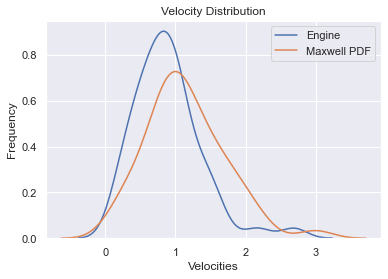

In [18]:
sns.distplot(velocities, bins=20, hist=True, kde=True, label="Engine")
#sns.distplot(sampling, bins=20, hist=True, kde=True, label="Maxwell PDF")
plt.title("Velocity Distribution")
plt.xlabel("Velocities")
plt.ylabel("Frequency")

Text(0, 0.5, 'Y')

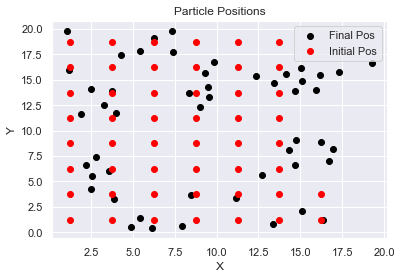

In [7]:
plt.scatter(endpos[:, 0], endpos[:, 1], color="black", label="Final Pos")
plt.scatter(initpos[:, 0], initpos[:, 1], color="red", label="Initial Pos")
plt.title("Particle Positions")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")

Text(0, 0.5, 'Energy per Atom')

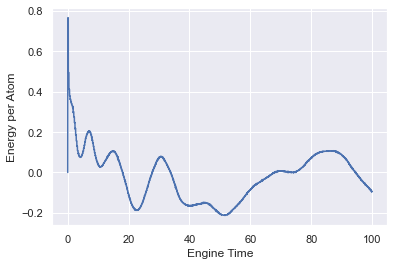

In [8]:
energy[:, 1] /= e.N
plt.plot(energy[:, 0], energy[:, 1])
plt.xlabel("Engine Time")
plt.ylabel("Energy per Atom")

Text(0, 0.5, 'Time-Avg Temperature')

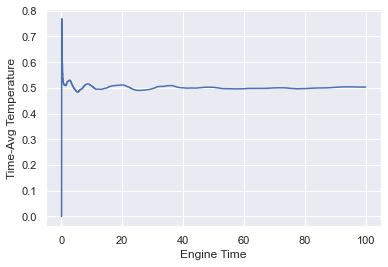

In [9]:
plt.plot(temp[:, 0], temp[:, 1])
plt.xlabel("Engine Time")
plt.ylabel("Time-Avg Temperature")

Text(0, 0.5, 'Time-Avg Pressure')

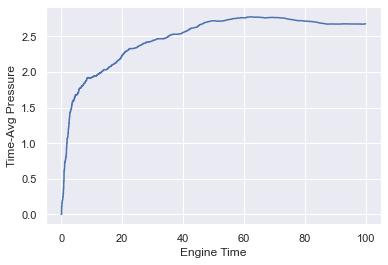

In [10]:
plt.plot(pressure[:, 0], pressure[:, 1])
plt.xlabel("Engine Time")
plt.ylabel("Time-Avg Pressure")

In [11]:
print(e.avgP)

2.6778415591349005


In [12]:
pre = (e.N * e.config["parameters"]["kB"] * e.avgT )/ e.volume

In [13]:
print(pre)

1.0071121574959017
